# Data Overview

In [139]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

# Read in data
data = pd.read_csv("admission0.csv")

In [140]:
# Example of what data looks like
data.head()

,sex,diversity,legacy,SAT,GPA,extracurricular,TOEFL,AP,letterScore,subject,admission
0,M,W,Y,1509.398,1.573,2,48.722,32,0.352,1,N
1,M,O,Y,853.885,2.403,6,41.644,3,0.602,4,N
2,M,A,N,937.916,2.147,9,70.826,3,0.411,4,N
3,M,W,N,1383.703,1.578,5,72.533,9,0.360,0,Y
4,F,O,N,1226.045,3.316,7,58.988,4,0.296,3,Y


In [141]:
# Verify that the dimensions are correct
print(data.shape)

(30000, 11)


In [142]:
# Verfiy all the categorical features have correct values
print(data["sex"].value_counts())
print()
print(data["diversity"].value_counts())
print()
print(data["legacy"].value_counts())

F    15059
M    14941
Name: sex, dtype: int64

W    11967
A     6063
O     4589
B     2969
H     2941
I     1471
Name: diversity, dtype: int64

N    23945
Y     6055
Name: legacy, dtype: int64


In [143]:
# Get statistics for numerical features
data.describe()

,SAT,GPA,extracurricular,TOEFL,AP,letterScore,subject
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1104.814728,2.505558,4.501300,77.748561,6.157733,0.501544,1.982900
std,315.653652,0.632994,2.871319,17.936035,6.909147,0.288642,1.413438
min,-193.977000,0.153000,0.000000,-1.688000,0.000000,0.000000,0.000000
25%,891.128750,2.075000,2.000000,65.772500,2.000000,0.252000,1.000000
50%,1103.253500,2.505500,5.000000,75.247500,5.000000,0.501000,2.000000
75%,1317.383750,2.936000,7.000000,90.567000,8.000000,0.754000,3.000000
max,2310.776000,5.041000,9.000000,152.269000,37.000000,1.000000,4.000000


In [144]:
# Get statistics for output admission
print(data["admission"].value_counts())

Y    17075
N    12925
Name: admission, dtype: int64


# Verify DAG Edge and Node Properties

In [145]:
# Convert counts to percentages
print(data["sex"].value_counts()/data.shape[0])
print()
print(data["diversity"].value_counts()/data.shape[0])
print()
print(data["legacy"].value_counts()/data.shape[0])

F    0.501967
M    0.498033
Name: sex, dtype: float64

W    0.398900
A    0.202100
O    0.152967
B    0.098967
H    0.098033
I    0.049033
Name: diversity, dtype: float64

N    0.798167
Y    0.201833
Name: legacy, dtype: float64


In [146]:
# Verify sex to SAT edge
data.groupby("sex")["SAT"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,15059.0,1203.426151,298.694785,161.125,1000.219,1204.438,1404.705,2310.776
M,14941.0,1005.424498,300.772492,-193.977,806.419,1001.906,1207.586,2205.932


In [147]:
# Verify sex to GPA edge
data.groupby("sex")["GPA"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,15059.0,2.706614,0.596194,0.357,2.305,2.708,3.107,5.041
M,14941.0,2.302915,0.603728,0.153,1.891,2.302,2.709,4.872


In [148]:
# Verify extracurricular information
data["extracurricular"].value_counts()/data.shape[0]

5    0.103867
8    0.102900
1    0.100500
2    0.100033
0    0.099700
3    0.099400
7    0.099267
9    0.098467
4    0.098133
6    0.097733
Name: extracurricular, dtype: float64

In [149]:
# Verify APs information
bucketOne = data["AP"][data["AP"].between(0,4)]
bucketTwo = data["AP"][data["AP"].between(5,9)]
bucketThree = data["AP"][data["AP"].between(10,37)]
print("First we check the buckets have the same probabilities we specified: ")
print("Percent of data between 0 and 4: ", len(bucketOne)/data.shape[0])
print("Percent of data between 5 and 9: ", len(bucketTwo)/data.shape[0])
print("Percent of data between 10 and 37: ", len(bucketThree)/data.shape[0])
print()

print("Now we check if uniform probability within buckets:")
print("Bucket One: ")
print(bucketOne.value_counts()/len(bucketOne))
print()
print("Bucket Two: ")
print(bucketTwo.value_counts()/len(bucketTwo))
print()
print("Bucket Three: ")
print(bucketThree.value_counts()/len(bucketThree))

First we check the buckets have the same probabilities we specified: 
Percent of data between 0 and 4:  0.4970333333333333
Percent of data between 5 and 9:  0.40486666666666665
Percent of data between 10 and 37:  0.0981

Now we check if uniform probability within buckets:
Bucket One: 
0    0.204547
1    0.200255
2    0.199182
3    0.198377
4    0.197639
Name: AP, dtype: float64

Bucket Two: 
9    0.203935
7    0.202206
8    0.200066
5    0.197925
6    0.195867
Name: AP, dtype: float64

Bucket Three: 
36    0.043493
26    0.041794
23    0.041454
22    0.040775
37    0.040435
30    0.039755
35    0.039076
12    0.038736
11    0.038736
33    0.037717
16    0.037037
13    0.036697
32    0.035678
14    0.035678
34    0.034998
20    0.034319
18    0.034319
24    0.033639
31    0.033299
25    0.032960
28    0.032620
29    0.032620
19    0.032280
17    0.031940
10    0.030921
21    0.030241
27    0.029562
15    0.029222
Name: AP, dtype: float64


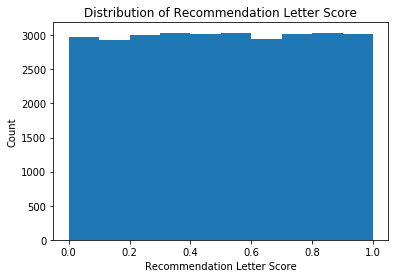

In [150]:
# Verify Letter Score information
plt.hist(data["letterScore"])
plt.xlabel("Recommendation Letter Score")
plt.ylabel("Count")
plt.title("Distribution of Recommendation Letter Score")
plt.show()

In [151]:
# Verify number of subject test information
data["subject"].value_counts()/data.shape[0]

0    0.203133
1    0.201633
2    0.200967
3    0.197733
4    0.196533
Name: subject, dtype: float64

In [152]:
# Verify diversity to TOEFL edge 
data.groupby("diversity")["TOEFL"].describe()

,count,mean,std,min,25%,50%,75%,max
diversity,,,,,,,,
A,6063.0,70.039659,4.957542,50.751,66.7645,70.140,73.3155,89.209
B,2969.0,89.992101,5.006665,72.106,86.5380,90.028,93.2860,106.197
H,2941.0,100.096028,10.123137,69.725,93.5520,99.834,107.0420,139.060
I,1471.0,79.674268,10.199589,43.187,73.0870,79.836,86.0100,112.031
O,4589.0,59.945652,9.797328,21.937,53.1610,60.043,66.7560,95.361
W,11967.0,79.714712,19.928893,-1.688,66.2445,79.432,93.1805,152.269


# Checking for Bias

In [153]:
# Encode categorical variables
categorical = ['sex', 'diversity', 'legacy', 'admission']
encoder = LabelEncoder()
encoded = data.copy()
encoded[categorical] = data[categorical].apply(encoder.fit_transform)
encoded.head()

,sex,diversity,legacy,SAT,GPA,extracurricular,TOEFL,AP,letterScore,subject,admission
0,1,5,1,1509.398,1.573,2,48.722,32,0.352,1,0
1,1,4,1,853.885,2.403,6,41.644,3,0.602,4,0
2,1,0,0,937.916,2.147,9,70.826,3,0.411,4,0
3,1,5,0,1383.703,1.578,5,72.533,9,0.360,0,1
4,0,4,0,1226.045,3.316,7,58.988,4,0.296,3,1


In [154]:
# For future reference get the mapping used for encoding
for column in categorical:
    print(column, ": ", *sorted(zip(encoded[column].unique(), data[column].unique()), 
                                key=lambda x: x[0]))

sex :  (0, 'F') (1, 'M')
diversity :  (0, 'A') (1, 'B') (2, 'H') (3, 'I') (4, 'O') (5, 'W')
legacy :  (0, 'N') (1, 'Y')
admission :  (0, 'N') (1, 'Y')


In [155]:
# Seperate into features and labels
X, y = encoded.loc[:, encoded.columns != 'admission'], encoded.admission

# Split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=12)

# Train logistic regression
model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(X_train, y_train)

# Get results
y_hat = model.predict(X_test)

# Get accuracy
print(model.score(X_test, y_test))

0.5903333333333334


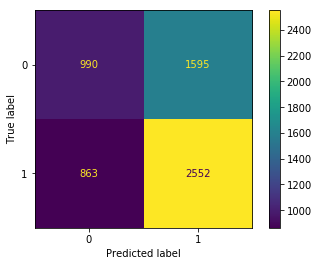

In [156]:
# Display confusion matrix
plot_confusion_matrix(model, X_test, y_test) 
plt.show()

In [157]:
# Accuracy for male and female
maleAccuracy = model.score(X_test[X_test['sex'] == 1], y_test[X_test['sex'] == 1])
femaleAccuracy = model.score(X_test[X_test['sex'] == 0], y_test[X_test['sex'] == 0])
print("Accuracy for male:", maleAccuracy)
print("Accuracy for femal:", femaleAccuracy)

Accuracy for male: 0.6376956376956376
Accuracy for femal: 0.5428762095428762


In [158]:
# Drop sex
X_train_no_sex = X_train.drop(['sex'], axis=1)
X_test_no_sex = X_test.drop(['sex'], axis=1)

# Retrain model
model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(X_train_no_sex, y_train)

# Get results
y_hat = model.predict(X_test_no_sex)

# Get accuracy
print(model.score(X_test_no_sex, y_test))

0.5668333333333333


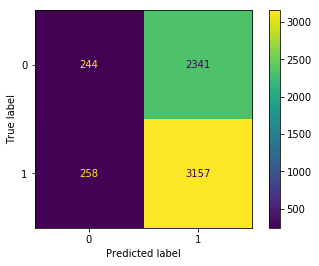

In [159]:
# Display confusion matrix
plot_confusion_matrix(model, X_test_no_sex, y_test) 
plt.show()

In [160]:
# Accuracy for male and female
maleAccuracy = model.score(X_test_no_sex[X_test["sex"] == 1], y_test[X_test['sex'] == 1])
femaleAccuracy = model.score(X_test_no_sex[X_test["sex"] == 0], y_test[X_test['sex'] == 0])
print("Accuracy for male:", maleAccuracy)
print("Accuracy for femal:", femaleAccuracy)

Accuracy for male: 0.631035631035631
Accuracy for femal: 0.5025025025025025
